__Assignment Day17__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__question 1__

 Using the given MT cars dataset you need to find outlier with z score.



In [3]:
import os

os.getcwd()


'C:\\Users\\Sidhartha\\lets upgrade'

In [4]:
os.chdir("C:/Users/Sidhartha/Downloads/ml-latest/ml-latest")

data = pd.read_csv('mtcars.csv')

data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
mean = np.mean(data) 
std = np.std(data) 
print('mean of the dataset is', mean) 
print('\n')
print('std. deviation is', std) 


mean of the dataset is mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64


std. deviation is mpg       5.932030
cyl       1.757795
disp    121.986781
hp       67.483071
drat      0.526258
wt        0.963048
qsec      1.758801
vs        0.496078
am        0.491132
gear      0.726184
carb      1.589762
dtype: float64


__outliers for column mpg__

In [8]:
data['mpg'].head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [9]:
data['zscore_mpg'] = (data['mpg'] - data['mpg'].mean())/data['mpg'].std()

data['zscore_mpg'].head(10)


0    0.150885
1    0.150885
2    0.449543
3    0.217253
4   -0.230735
5   -0.330287
6   -0.960789
7    0.715018
8    0.449543
9   -0.147774
Name: zscore_mpg, dtype: float64

In [10]:
data[data['zscore_mpg']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg


In [11]:
data[data['zscore_mpg']<-3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg


In [12]:
data[data[data['zscore_mpg']>3] | data[data['zscore_mpg']<-3]]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__so there are no outliers in the column mpg__

__outliers in column cyl__

In [13]:
data['cyl'].head()

0    6
1    6
2    4
3    6
4    8
Name: cyl, dtype: int64

In [14]:
data['zscore_cyl'] = (data['cyl'] - data['cyl'].mean())/data['cyl'].std()

data['zscore_cyl'].head(10)

0   -0.104988
1   -0.104988
2   -1.224858
3   -0.104988
4    1.014882
5   -0.104988
6    1.014882
7   -1.224858
8   -1.224858
9   -0.104988
Name: zscore_cyl, dtype: float64

In [15]:
data[data['zscore_cyl']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl


In [16]:
data[data['zscore_cyl']<-3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl


In [17]:
data[data[data['zscore_cyl']>3] | data[data['zscore_cyl']<-3]].head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence there are no outliers in cyl column__

__outliers in column disp__

In [18]:
data['disp'].head()

0    160.0
1    160.0
2    108.0
3    258.0
4    360.0
Name: disp, dtype: float64

In [19]:
data['zscore_disp'] = (data['disp'] - data['disp'].mean())/data['disp'].std()

data['zscore_disp'].head(10)

0   -0.570620
1   -0.570620
2   -0.990182
3    0.220094
4    1.043081
5   -0.046167
6    1.043081
7   -0.677931
8   -0.725535
9   -0.509299
Name: zscore_disp, dtype: float64

In [20]:
data[data['zscore_disp']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp


In [21]:
data[data['zscore_disp']<-3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp


__hence there are no outliers in disp column__

__outliers in column hp__

In [22]:
data['hp'].head()

0    110
1    110
2     93
3    110
4    175
Name: hp, dtype: int64

In [23]:
data['zscore_hp'] = (data['hp'] - data['hp'].mean())/data['hp'].std()

data['zscore_hp'].head(10)

0   -0.535093
1   -0.535093
2   -0.783040
3   -0.535093
4    0.412942
5   -0.608019
6    1.433903
7   -1.235180
8   -0.753870
9   -0.345486
Name: zscore_hp, dtype: float64

In [24]:
data[data['zscore_disp']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp


In [25]:
data[data['zscore_disp']<-3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp


__hence there are no outliers in column hp__

__outliers in column drat__

In [26]:
data['drat'].head()

0    3.90
1    3.90
2    3.85
3    3.08
4    3.15
Name: drat, dtype: float64

In [27]:
data['zscore_disp'] = (data['disp'] - data['disp'].mean())/data['disp'].std()

print(data['zscore_disp'].head(10))

print(data[data['zscore_disp']>3])

print(data[data['zscore_disp']<-3])

data[data[data['zscore_disp']>3] | data[data['zscore_disp']<-3]].head(10)

0   -0.570620
1   -0.570620
2   -0.990182
3    0.220094
4    1.043081
5   -0.046167
6    1.043081
7   -0.677931
8   -0.725535
9   -0.509299
Name: zscore_disp, dtype: float64
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp]
Index: []
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp]
Index: []


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence there are no outliers in column drat__

__outliers in column wt__

In [28]:
data['wt'].head()

0    2.620
1    2.875
2    2.320
3    3.215
4    3.440
Name: wt, dtype: float64

In [29]:
data['zscore_wt'] = (data['wt'] - data['wt'].mean())/data['wt'].std()

print(data['zscore_wt'].head(10))

print(data[data['zscore_wt']>3])

print(data[data['zscore_wt']<-3])

data[data[data['zscore_wt']>3] | data[data['zscore_wt']<-3]].head(10)



0   -0.610400
1   -0.349785
2   -0.917005
3   -0.002300
4    0.227654
5    0.248095
6    0.360516
7   -0.027850
8   -0.068731
9    0.227654
Name: zscore_wt, dtype: float64
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt]
Index: []
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt]
Index: []


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence there are no outliers in column wt__

__outliers in column qsec__

In [30]:
data['zscore_qsec'] = (data['qsec'] - data['qsec'].mean())/data['qsec'].std()

print(data['zscore_qsec'].head(10))

print(data[data['zscore_qsec']>3])

print(data[data['zscore_qsec']<-3])

data[data[data['zscore_qsec']>3] | data[data['zscore_qsec']<-3]].head(10)



0   -0.777165
1   -0.463781
2    0.426007
3    0.890487
4   -0.463781
5    1.326987
6   -1.124126
7    1.203871
8    2.826755
9    0.252526
Name: zscore_qsec, dtype: float64
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec]
Index: []
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec]
Index: []


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence no outliers in column qsec__

__outliers in column vs__

In [31]:
data['vs'].head()

0    0
1    0
2    1
3    1
4    0
Name: vs, dtype: int64

In [32]:
data['zscore_vs'] = (data['vs'] - data['vs'].mean())/data['vs'].std()

print(data['zscore_vs'].head(10))

print(data[data['zscore_vs']>3])

print(data[data['zscore_vs']<-3])

data[data[data['zscore_vs']>3] | data[data['zscore_vs']<-3]].head(10)


0   -0.868028
1   -0.868028
2    1.116036
3    1.116036
4   -0.868028
5    1.116036
6   -0.868028
7    1.116036
8    1.116036
9    1.116036
Name: zscore_vs, dtype: float64
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec, zscore_vs]
Index: []
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec, zscore_vs]
Index: []


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence no outliers in vs column__

__outlier in column am__

In [33]:
data.am.head(10)

0    1
1    1
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: am, dtype: int64

In [34]:
data['zscore_am'] = (data['am'] - data['am'].mean())/data['am'].std()

print(data['zscore_am'].head(10))

print(data[data['zscore_am']>3])

print(data[data['zscore_am']<-3])

data[data[data['zscore_am']>3] | data[data['zscore_am']<-3]].head(10)


0    1.189901
1    1.189901
2    1.189901
3   -0.814143
4   -0.814143
5   -0.814143
6   -0.814143
7   -0.814143
8   -0.814143
9   -0.814143
Name: zscore_am, dtype: float64
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec, zscore_vs, zscore_am]
Index: []
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec, zscore_vs, zscore_am]
Index: []


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence no outliers in column am__

__outliers in column gear__

In [35]:
data.gear.head(10)

0    4
1    4
2    4
3    3
4    3
5    3
6    3
7    4
8    4
9    4
Name: gear, dtype: int64

In [36]:
data['zscore_gear'] = (data['gear'] - data['gear'].mean())/data['gear'].std()

print(data['zscore_gear'].head(10))

print(data[data['zscore_gear']>3])

print(data[data['zscore_gear']<-3])

data[data[data['zscore_gear']>3] | data[data['zscore_gear']<-3]].head(10)


0    0.423554
1    0.423554
2    0.423554
3   -0.931819
4   -0.931819
5   -0.931819
6   -0.931819
7    0.423554
8    0.423554
9    0.423554
Name: zscore_gear, dtype: float64
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec, zscore_vs, zscore_am, zscore_gear]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, zscore_mpg, zscore_cyl, zscore_disp, zscore_hp, zscore_wt, zscore_qsec, zscore_vs, zscore_am, zscore_gear]
Index: []

[0 rows x 21 columns]


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,carb,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__hence no outliers in gear column__

__outliers in carb column__

In [37]:
data.carb.head(10)

0    4
1    4
2    1
3    1
4    2
5    1
6    4
7    2
8    2
9    4
Name: carb, dtype: int64

In [38]:
data['zscore_carb'] = (data['carb'] - data['carb'].mean())/data['carb'].std()

print(data['zscore_carb'].head(10))


0    0.735203
1    0.735203
2   -1.122152
3   -1.122152
4   -0.503034
5   -1.122152
6    0.735203
7   -0.503034
8   -0.503034
9    0.735203
Name: zscore_carb, dtype: float64


In [39]:
data[data['zscore_carb']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear,zscore_carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,...,-0.844644,1.014882,0.567039,2.746567,0.360516,-1.818049,-0.868028,1.189901,1.778928,3.211677


In [40]:
data[data['zscore_carb']<-3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear,zscore_carb


In [41]:
data[data['zscore_carb']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear,zscore_carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,...,-0.844644,1.014882,0.567039,2.746567,0.360516,-1.818049,-0.868028,1.189901,1.778928,3.211677


__there is  a outlier in column carb__

In [42]:
data[data['carb']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear,zscore_carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,...,0.150885,-0.104988,-0.570620,-0.535093,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,...,0.150885,-0.104988,-0.570620,-0.535093,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,...,-0.960789,1.014882,1.043081,1.433903,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,...,-0.147774,-0.104988,-0.509299,-0.345486,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,...,-0.380064,-0.104988,-0.509299,-0.345486,0.227654,0.588295,1.116036,-0.814143,0.423554,0.735203
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,...,-1.607883,1.014882,1.946754,0.850497,2.077505,0.073449,-0.868028,-0.814143,-0.931819,0.735203
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,...,-1.607883,1.014882,1.849932,0.996348,2.255336,-0.016089,-0.868028,-0.814143,-0.931819,0.735203
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,...,-0.894420,1.014882,1.688562,1.215126,2.174596,-0.239935,-0.868028,-0.814143,-0.931819,0.735203
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,...,-1.126710,1.014882,0.962396,1.433903,0.636461,-1.364761,-0.868028,-0.814143,-0.931819,0.735203
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,...,-0.711907,1.014882,0.970465,1.711021,-0.048290,-1.874010,-0.868028,1.189901,1.778928,0.735203


__outlier in column hp using iqr technique__

<function matplotlib.pyplot.show(*args, **kw)>

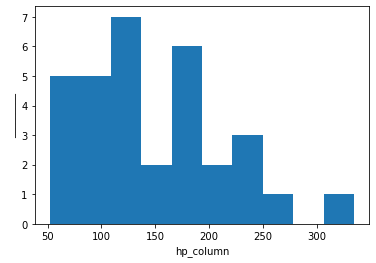

In [43]:
plt.hist(data.hp,bins=10)
plt.xlabel('hp_column')
plt.ylabel('_________')
plt.show

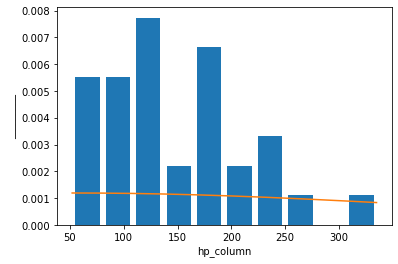

In [44]:
from scipy.stats import norm
plt.hist(data.hp, bins=10, rwidth=0.8, density=True)
plt.xlabel('hp_column')
plt.ylabel('_________')
plt.show

rng = np.arange(data.hp.min(), data.hp.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.hp.min(),data.hp.max()))

In [45]:
upper_limit = data.hp.mean() + 3*data.hp.std()

lower_limit = data.hp.mean() - 3*data.hp.std()

print(upper_limit)
print(lower_limit)

352.3761054679618
-59.00110546796179


In [46]:
data[data['hp']>upper_limit]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear,zscore_carb


In [47]:
data[data['hp']<lower_limit]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,...,zscore_mpg,zscore_cyl,zscore_disp,zscore_hp,zscore_wt,zscore_qsec,zscore_vs,zscore_am,zscore_gear,zscore_carb


__so no outliers in hp column__ 

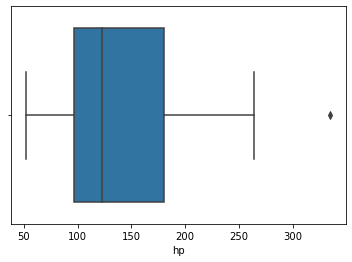

In [48]:
sns.boxplot(x=data['hp'])

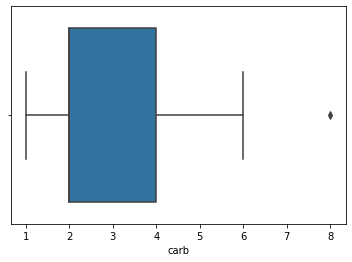

In [49]:
sns.boxplot(x=data['carb'])

#infer :

# there is a outlier in carb column 

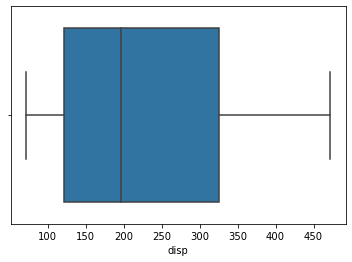

In [50]:
sns.boxplot(x=data['disp'])

__question 2__

__Using the Boston data set from sklearn, find out the Outlier and treat them.__


In [51]:
from sklearn.datasets import load_boston

boston = load_boston()



In [52]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [53]:
print(boston.data.shape)

(506, 13)


In [54]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [55]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


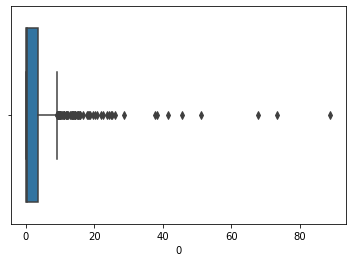

In [58]:
sns.boxplot(x=df[0])

# we can infer that there ara outliers on it

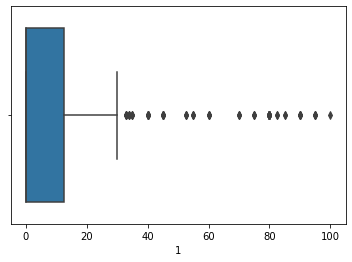

In [65]:
sns.boxplot(x=df[1])


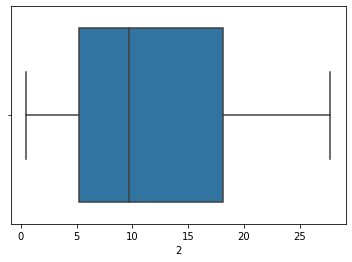

In [66]:
sns.boxplot(x=df[2])


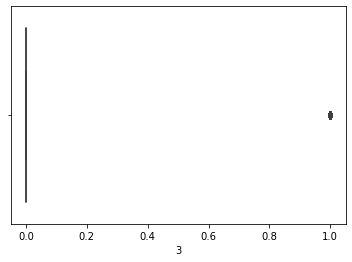

In [67]:
sns.boxplot(x=df[3])


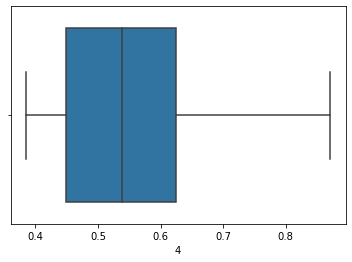

In [68]:
sns.boxplot(x=df[4])


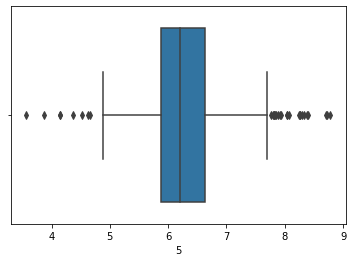

In [69]:
sns.boxplot(x=df[5])


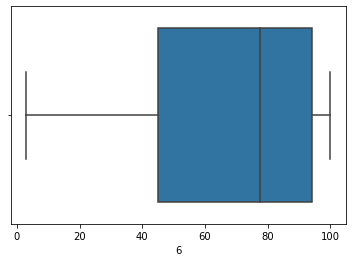

In [70]:
sns.boxplot(x=df[6])


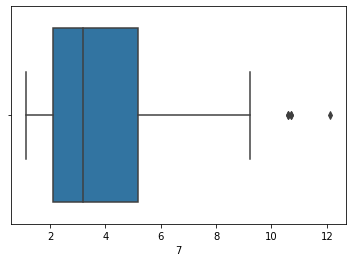

In [71]:
sns.boxplot(x=df[7])


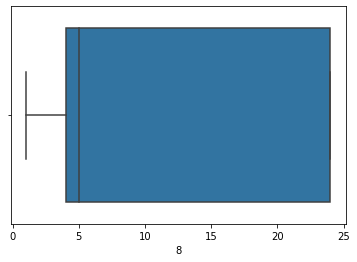

In [72]:
sns.boxplot(x=df[8])


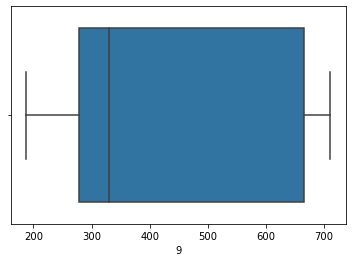

In [73]:
sns.boxplot(x=df[9])


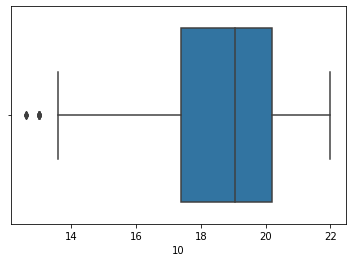

In [74]:
sns.boxplot(x=df[10])


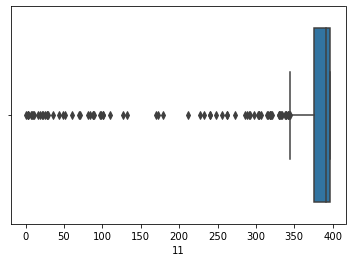

In [75]:
sns.boxplot(x=df[11])


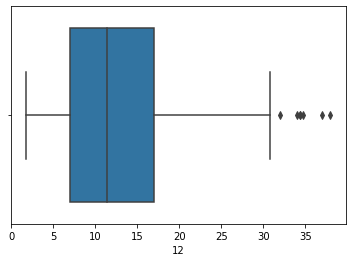

In [76]:
sns.boxplot(x=df[12])


__from above boxplots we can infer that__


 __the following columns have outlier:__
        
  __[1,3,5,7,8,10,11,12]__
        
        

__finding outliers using z_score__

In [114]:
Z_scores = (df - df.mean())/df.std()

d = 3

Z_mask = (Z_scores > -d) & (Z_scores < d)
 
Z_mask.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,True,True,True,False,True,True,True,True,True,True,True,True,True
1,True,True,True,False,True,True,True,True,True,True,True,True,True
2,True,True,True,False,True,True,True,True,True,True,True,True,True
3,True,True,True,False,True,True,True,True,True,True,True,True,True
4,True,True,True,False,True,True,True,True,True,True,True,True,True


__dropping outlier values__

In [92]:
df = df[Z_mask].dropna()

print(df.shape)

(415, 13)


In [93]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [95]:
df.shape

(415, 13)

In [112]:
no_of_items_in_original_data = boston.data.shape[0]

no_of_items_in_modified_data = df.shape[0]

print(no_of_items_in_original_data)
print(no_of_items_in_modified_data)

outliers = no_of_items_in_original_data - no_of_items_in_modified_data
print('no of items dropped for outlier data ',outliers)

506
415
no of items dropped for outlier data  91


__END__